In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine('sqlite:///Resources/hawaii.sqlite')

In [5]:
# reflect an existing database into a new model
base = automap_base()

# reflect the tables
base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement = base.classes.measurement
station = base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
most_recent_date = session.query(measurement.date).order_by(measurement.date).first()
print(most_recent_date)

('2010-01-01',)


In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
most_recent_date = session.query(measurement.date).order_by(measurement.date).first()

# Calculate the date one year from the last date in data set.
latest_date = session.query(measurement.date).order_by(measurement.date.desc()).first()

one_year_from_last = dt.datetime(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
data_precip_score = session.query(measurement.date, measurement.prcp).\
                    filter(measurement.date >= one_year_from_last).\
                    order_by(measurement.date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
precip_df = pd.DataFrame(data_precip_score, columns=['Date', 'Precipitation'])
precip_df.set_index('Date', inplace=True)

# Sort the dataframe by date
precip_df = precip_df.sort_values(by='Date')

<function matplotlib.pyplot.show(close=None, block=None)>

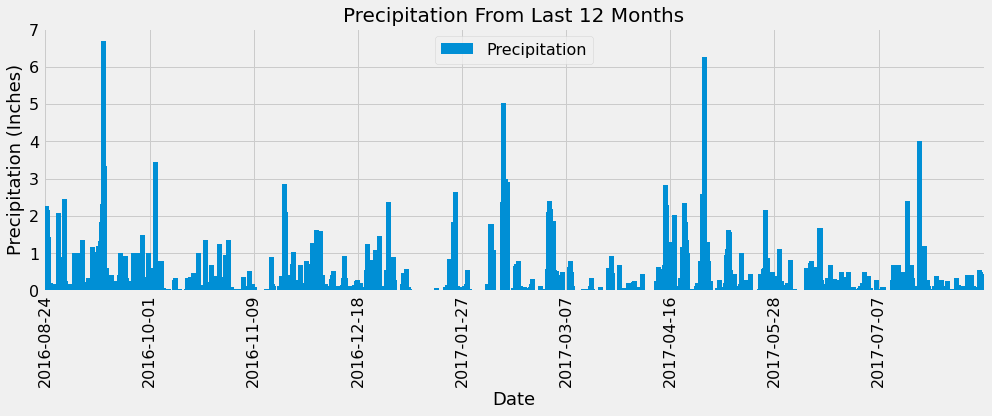

In [11]:
# Use Pandas Plotting with Matplotlib to plot the data
ax = precip_df.plot(kind='bar', width=12, figsize=(14,6))
plt.locator_params(axis='x', nbins=9)
ax.tick_params(axis='both', labelsize=16)
ax.grid(True)
plt.legend(loc='upper center', fontsize='16')
plt.title('Precipitation From Last 12 Months', size=20)
plt.ylabel('Precipitation (Inches)', size=18)
plt.xlabel('Date', size=18)
plt.tight_layout()
plt.savefig('Images/Precipitation.png')
plt.show

In [19]:
# Use Pandas to calcualte the summary statistics for the precipitation data
print(precip_df.describe())

       Precipitation
count    2015.000000
mean        0.176462
std         0.460288
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000


# Exploratory Station Analysis

In [13]:
# Design a query to calculate the total number stations in the dataset
station_total= session.query(measurement.station).distinct().count()

In [14]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
station_activity = session.query(measurement.station, func.count(measurement.station)).\
                       group_by(measurement.station).\
                       order_by(func.count(measurement.station).desc()).all()

In [15]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station = station_activity[0][0]
session.query(func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).\
              filter(measurement.station == most_active_station).all()

[(54.0, 85.0, 71.66378066378067)]

In [16]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station
year_temp = session.query(measurement.station, measurement.tobs).\
                filter(measurement.station == most_active_station).\
                filter(measurement.date >= one_year_from_last).all()
station_year_df = pd.DataFrame(year_temp)
station_year_df.set_index('station', inplace=True)
station_year_df.head()

,tobs
station,
USC00519281,77.0
USC00519281,80.0
USC00519281,80.0
USC00519281,75.0
USC00519281,73.0


# Close session

<function matplotlib.pyplot.show(close=None, block=None)>

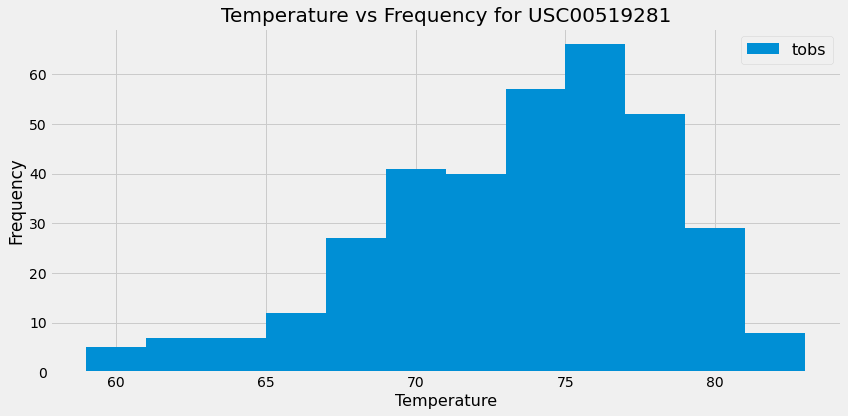

In [17]:
# Plot the results as a histogram
station_year_df.plot.hist(by='station', bins=12, figsize=(12,6))
ax.grid(True)
plt.title('Temperature vs Frequency for ' + most_active_station, fontsize=20)
plt.xlabel('Temperature', fontsize=16)
plt.legend(loc='upper right', fontsize=16)
plt.tight_layout()
plt.savefig('Images/station-histogram.png')
plt.show

In [18]:
# Close Session
session.close()